In [1]:
import pennylane as qml
from pennylane import numpy as np
import networkx as nx
import itertools
import random as rnd
import pylab as plt
from networkx.generators.trees import random_tree


Graph with 5 nodes:


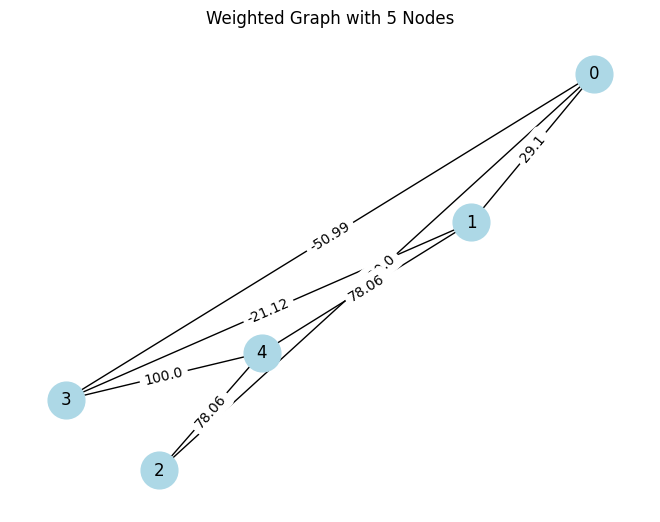


Graph with 10 nodes:


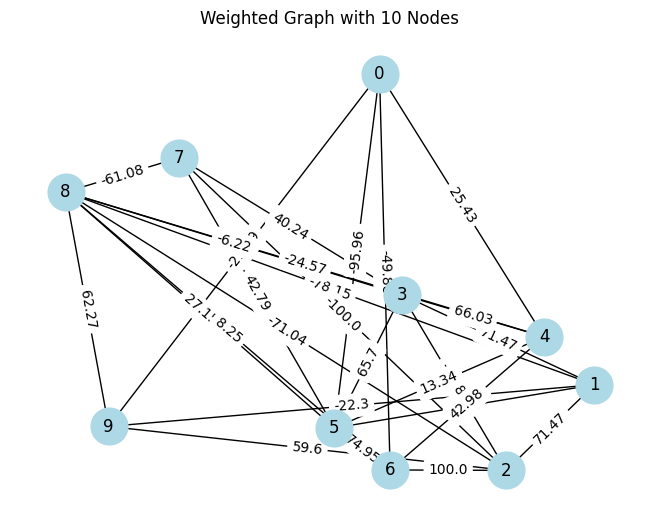


Graph with 15 nodes:


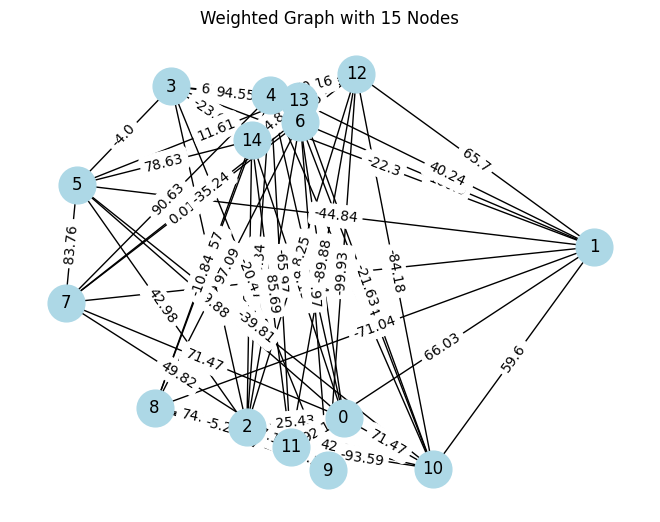


Graph with 20 nodes:


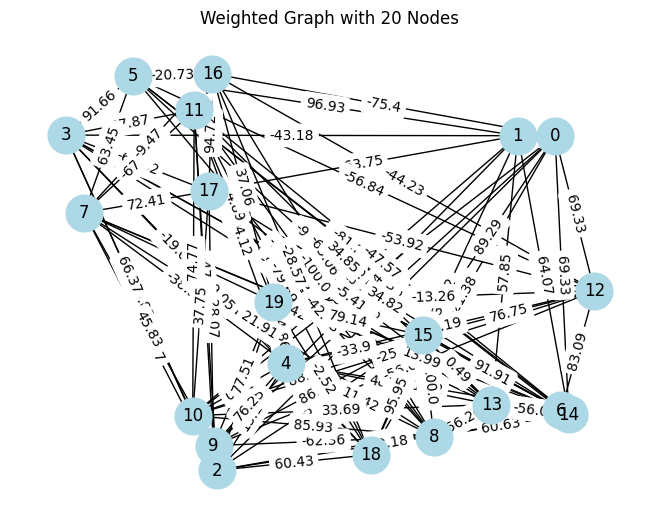


Graph with 25 nodes:


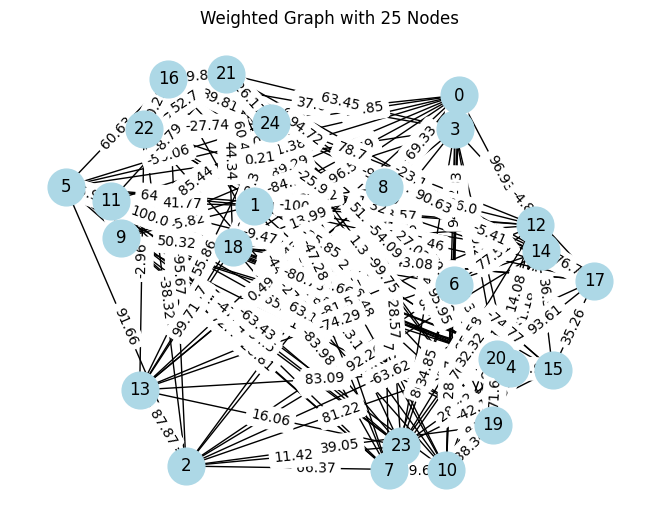

In [2]:
def random_dist(size=1, low=-100, high=100): #change here with low = -10 and high = 10 for smaller inner difference
  values = np.random.random_sample(size)
  values = np.interp(values, (values.min(), values.max()), (low, high))
  return values

def generate_induced_subgraph_game(distribution, n_agents, sparsity=0.0, seed = 123, **kwargs):
    """
    generate_induced_subgraph_game: To generate a .
    :distribution: distribution function name to sample the edge weights from. (dtype: function)
    :n_agents: number of agents (dtype: int)
    :sparsity: describes the connectivity of the graph edges. \
    If 0.0, generates a fully connected graph. \
    If 1.0 generates a connected graph with minimal edges.
    (dtype: float, range: [0,1])
    :returns: induced subgraph game with agents pairs as key and their synergy as float value.
    (dtype: dictionary)
    """
    induced_subgraph_game = {}
    #### D: tyring to set a seed to get compareable results
    connected_edges = [(i + 1, j + 1) for i, j in random_tree(n_agents, seed=seed).edges]
    extra_edges = list(set(itertools.combinations(range(1, n_agents + 1), 2)).difference(connected_edges))
    #### D: seed
    rnd.seed(seed)
    sampled_edges = rnd.sample(extra_edges, int((1 - sparsity) * len(extra_edges)))
    keys = sorted(connected_edges + sampled_edges)
    totalinteractions = len(keys)
    np.random.seed(seed=seed)
    values = distribution(totalinteractions, **kwargs)
    for i, key in enumerate(keys):
        induced_subgraph_game[','.join(map(str, key))] = float(np.round(values[i], 2))
    G=nx.Graph()
    # G.add_nodes_from(np.arange(0,n_agents,1))
    G.add_nodes_from([int(i) for i in np.arange(0, n_agents, 1)])
    elist = [tuple((int(x)-1 for x in key.split(',')))+tuple([induced_subgraph_game[key]*-1]) for key in induced_subgraph_game]
    G.add_weighted_edges_from(elist)
    return induced_subgraph_game, G

# graph size
# graph_size = list(range(5, 51, 5)) 
graph_size = list(range(5, 26, 5)) 
graphs = []
isgs = []
for n in graph_size:
    isg, G = generate_induced_subgraph_game(random_dist, n, sparsity=0.5, seed=42)
    graphs.append(G)
    isgs.append(isg)
    print(f"\nGraph with {n} nodes:")
    plt.clf()
    pos = nx.spring_layout(G, seed=42) 
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in edge_labels.items()})

    plt.title(f"Weighted Graph with {n} Nodes")
    plt.show()  

In [3]:
# print(G.nodes)
# plt.clf()  
# pos = nx.spring_layout(G)  # Layout for positioning
# edge_labels = nx.get_edge_attributes(G, 'weight')

# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
# nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in edge_labels.items()})

# plt.title("NetworkX Weighted Graph")
# plt.show()



Running Gurobi MaxCut on Graph 1 with 5 nodes
Restricted license - for non-production use only - expires 2026-11-23
Total MaxCut Value = 256.12
Total MaxCut Value = 256.12


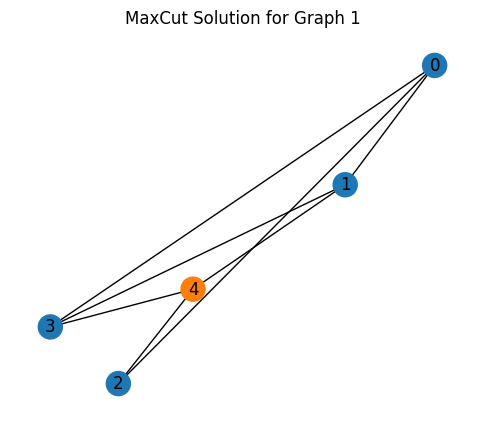


Running Gurobi MaxCut on Graph 2 with 10 nodes
Total MaxCut Value = 578.29
Total MaxCut Value = 578.29


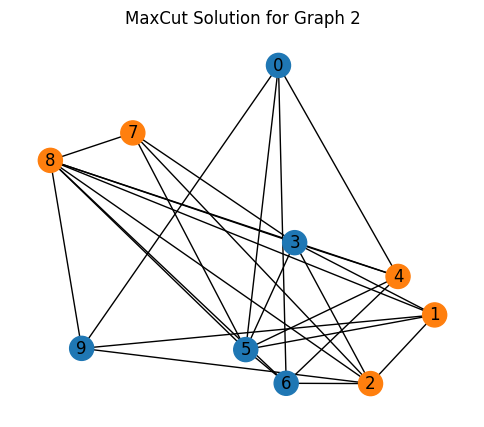


Running Gurobi MaxCut on Graph 3 with 15 nodes
Total MaxCut Value = 1093.8899999999999
Total MaxCut Value = 1093.8899999999999


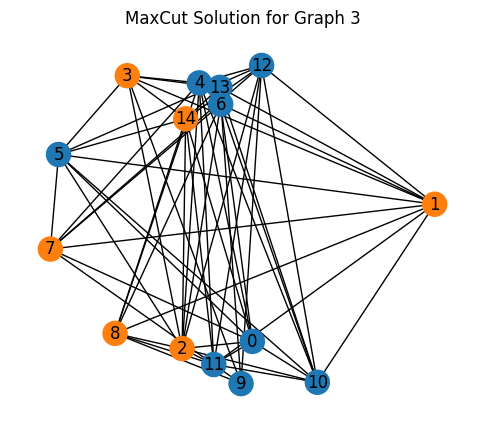


Running Gurobi MaxCut on Graph 4 with 20 nodes
Total MaxCut Value = 1882.74
Total MaxCut Value = 1882.74


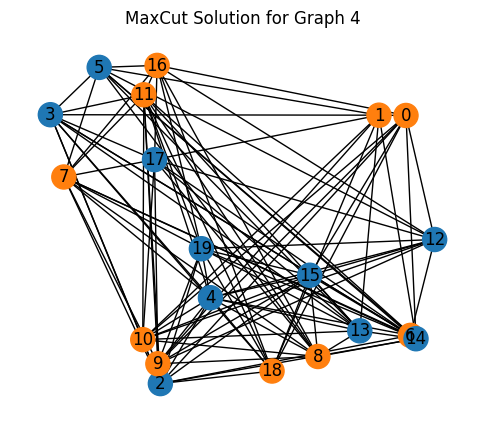


Running Gurobi MaxCut on Graph 5 with 25 nodes
Total MaxCut Value = 2045.1500000000003
Total MaxCut Value = 2045.1500000000003


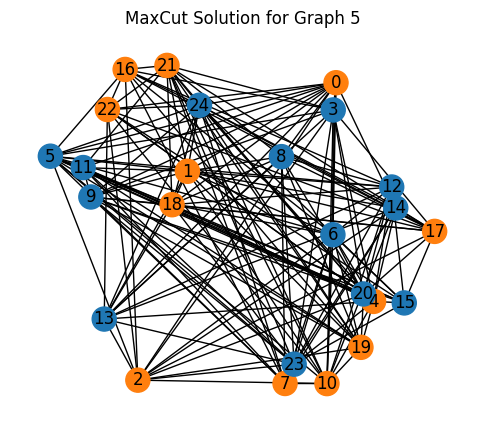

[256.12, 578.29, 1093.8899999999999, 1882.74, 2045.1500000000003]


In [4]:
from gurobi import MaxCutGurobi
import matplotlib.pyplot as plt

gurobi_costs = []
for i, G in enumerate(graphs):
    print(f"\nRunning Gurobi MaxCut on Graph {i + 1} with {len(G.nodes)} nodes")

    grb = MaxCutGurobi()
    grb.build_model(graph=G)
    solution = grb.run_model(verbose=False)
    
    cost = grb.compute_maxcut(solution)
    gurobi_costs.append(cost)
    
    fig, ax = plt.subplots(figsize=(6, 5))
    grb.show_result(sol=solution, ax=ax)
    plt.title(f"MaxCut Solution for Graph {i + 1}")
    plt.show()
print(gurobi_costs)


Running PCE MaxCut on Graph 1 with 5 nodes


/Users/ssirisha/PCE-quantum-opt/venv/lib/python3.13/site-packages/pennylane/ops/op_math/composite.py:209: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


Number of variables in circuit: 28
Total MaxCut Value = Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace>
Total MaxCut Value = 256.12
Total MaxCut Value = 256.12


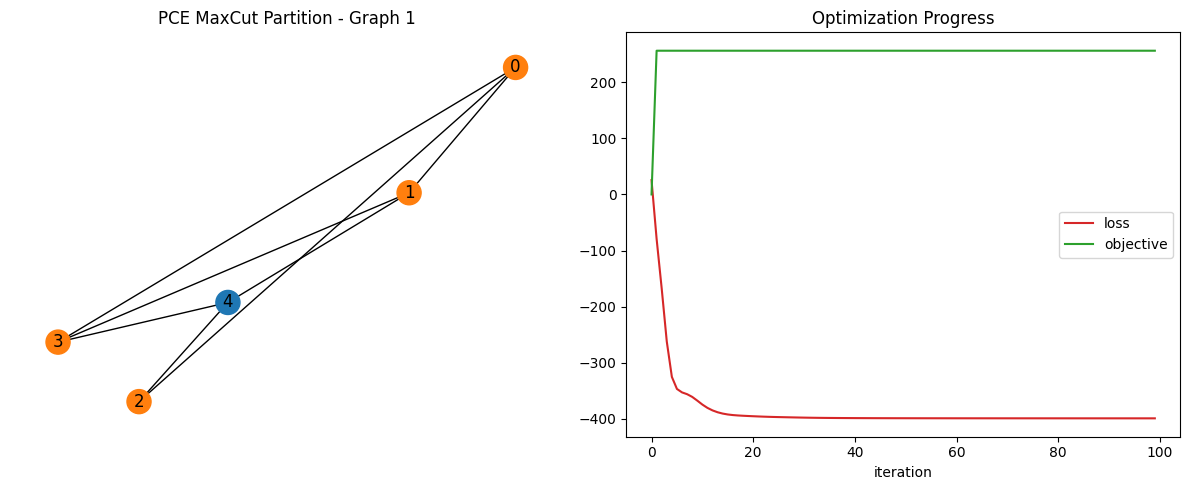


Running PCE MaxCut on Graph 2 with 10 nodes
Number of variables in circuit: 28
Total MaxCut Value = Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace>
Total MaxCut Value = 446.46
Total MaxCut Value = 446.46


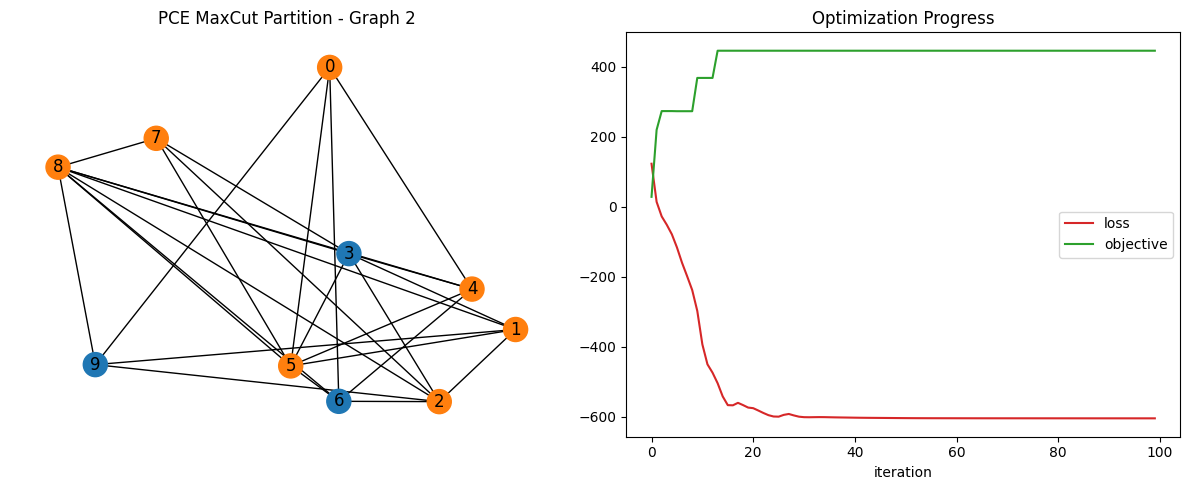


Running PCE MaxCut on Graph 3 with 15 nodes
Number of variables in circuit: 28
Total MaxCut Value = Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace>
Total MaxCut Value = 915.8699999999997
Total MaxCut Value = 915.8699999999997


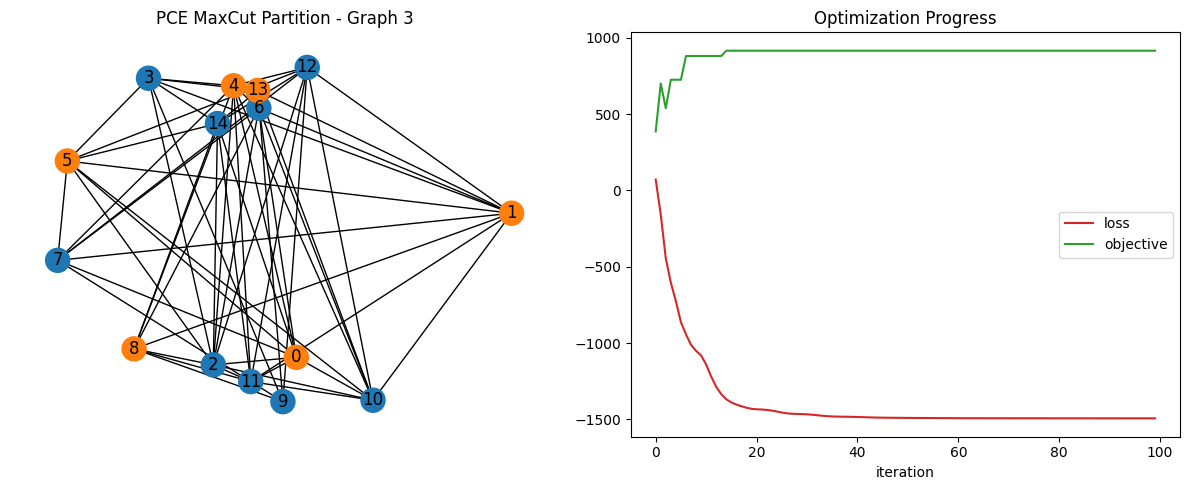


Running PCE MaxCut on Graph 4 with 20 nodes
Number of variables in circuit: 28
Total MaxCut Value = Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace>
Total MaxCut Value = 1649.9999999999998
Total MaxCut Value = 1649.9999999999998


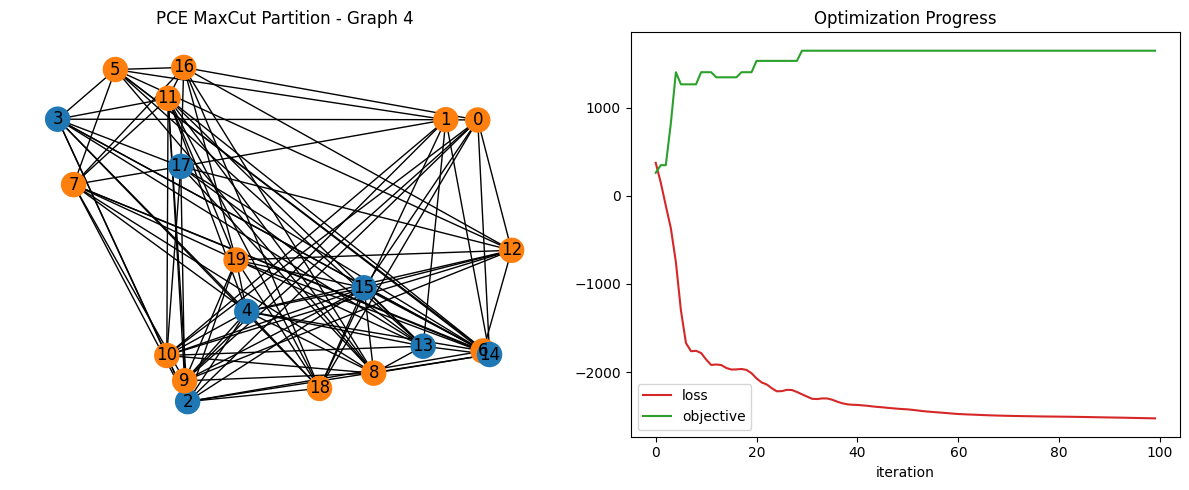


Running PCE MaxCut on Graph 5 with 25 nodes
Number of variables in circuit: 28
Total MaxCut Value = Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace>
Total MaxCut Value = 1733.4699999999998
Total MaxCut Value = 1733.4699999999998


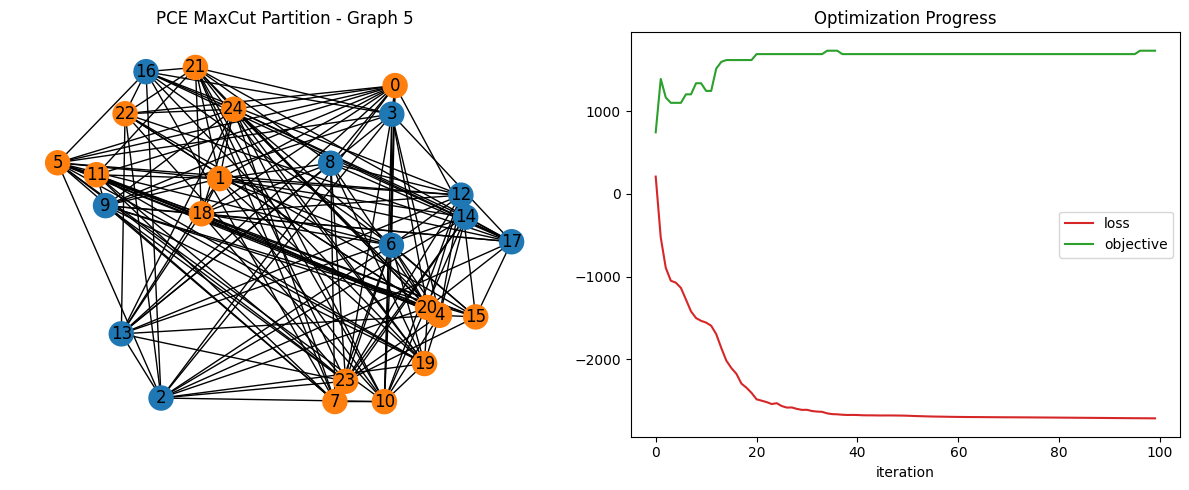

[256.12, 446.46, 915.8699999999997, 1649.9999999999998, 1733.4699999999998]


In [5]:
from pce import MaxCutPCE
import optax
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np

num_qubits = 8
num_layers = 4
k_body_corr = 2

pce_costs = []

def ansatz(params):
    for l in range(num_layers):
        thetas = params[l]
        for w in range(num_qubits):
            qml.RY(phi=thetas[w], wires=w)
        for w in range(num_qubits - 1):
            qml.CNOT(wires=[w, w + 1])

# Optimizer and device setup
opt = optax.adam(learning_rate=0.1)
dev = qml.device("default.qubit", wires=num_qubits)
alpha = num_qubits ** (k_body_corr / 2)
pauli_ops = MaxCutPCE.get_pauli_ops(n=num_qubits, k=k_body_corr, bases=["X"])

for i, G in enumerate(graphs):
    print(f"\nRunning PCE MaxCut on Graph {i + 1} with {len(G.nodes)} nodes")

    # Initialize PCE solver
    pce = MaxCutPCE(device=dev, optimizer=opt, ansatz=ansatz, alpha=alpha, jit=True)
    pce.build_model(graph=G, num_qubits=num_qubits, pauli_ops=pauli_ops)

    # Random seed and parameter initialization
    np.random.seed(42)
    params = np.random.uniform(size=(num_layers, num_qubits))

    # Run optimization
    solution, loss_hist, obj_hist = pce.run_model(params=params, iters=100)

    #storing cost
    cost = pce.compute_maxcut(solution)
    pce_costs.append(cost)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    pce.show_result(sol=solution, ax=ax1)
    ax1.set_title(f"PCE MaxCut Partition - Graph {i + 1}")
    pce.show_optimization(loss_hist=loss_hist, obj_hist=obj_hist, ax=ax2)
    ax2.set_title("Optimization Progress")
    plt.tight_layout()
    plt.show()
print(pce_costs)

[1.0, 1.295278412399767, 1.1943725637918048, 1.1410545454545455, 1.1798012079816786]


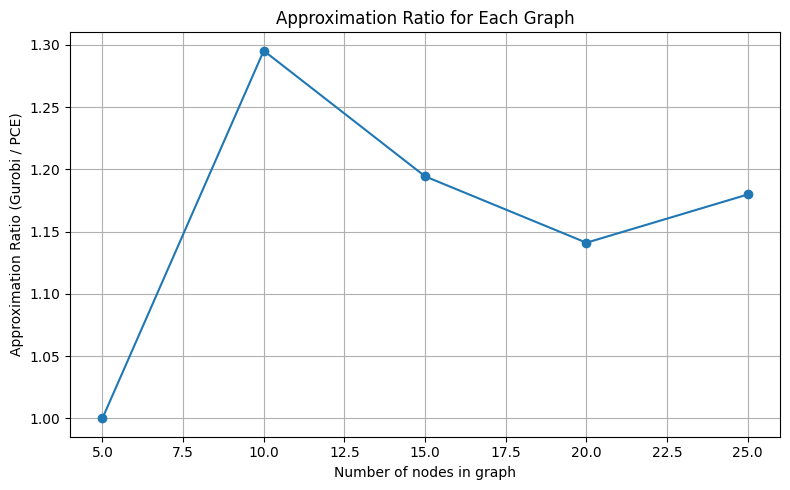

In [6]:
# plotting the ratio graphs

# calculating ratios and accounting for 0 JUST IN CASE
approx_ratios = [g / p if p != 0 else 0 for g, p in zip(gurobi_costs, pce_costs)]
print(approx_ratios)
# Plot
plt.figure(figsize=(8, 5))
plt.plot(graph_size, approx_ratios, marker='o', linestyle='-')
plt.xlabel("Number of nodes in graph")
plt.ylabel("Approximation Ratio (Gurobi / PCE)")
plt.title("Approximation Ratio for Each Graph")
plt.grid(True)
plt.tight_layout()
plt.show()